# Calculating Frequencies and Power Spectras using MNE

In this tutorial, you will learn how to perform a spectral analysis using Python MNE. We will use a prepared data set that you need to download (~1.54 GB). 

In [1]:
# We import the necessary libraries

# numpy is used for numeric calculations
import numpy as np
# matplotlib is used to plot graphs
import matplotlib.pyplot as plt

# mne is used to process and analyze time series signals
import mne
from mne import io, read_proj, read_selection
from mne.datasets import sample
from mne.time_frequency import psd_multitaper

## We will download some prepared data for further processing

In [2]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
proj_fname = data_path + '/MEG/sample/sample_audvis_eog-proj.fif'

tmin, tmax = 0, 60  # use the first 60s of data

# Setup for reading the raw data (to save memory, crop before loading)
raw = io.read_raw_fif(raw_fname).crop(tmin, tmax).load_data()
raw.info['bads'] += ['MEG 2443', 'EEG 053']  # bads + 2 more

raw.pick_types(meg=False, eeg=True, eog=False)
# look at frequencies between 2 and 300Hz
fmin, fmax = 2, 300
# the FFT size (n_fft). Ideally a power of 2
n_fft = 2048  

Opening raw data file /home/kosch/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


Effective window size : 3.410 (s)


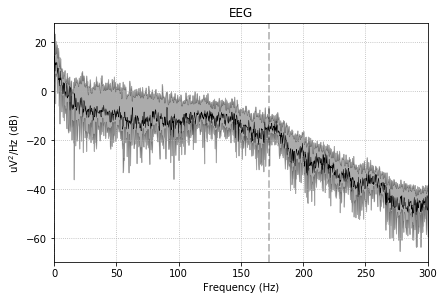

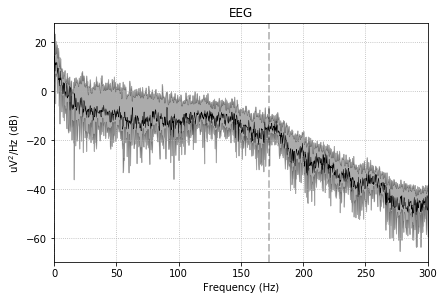

In [4]:
%matplotlib inline
# plot the power spectrum for EEG data
raw.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 sec)

3 projection items activated
The projections don't apply to these data. Doing nothing.
Effective window size : 3.410 (s)


Text(0.5, 1, 'Average of 4 EEG channels')

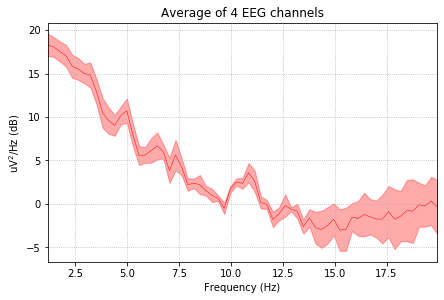

In [5]:
# we are interested less details, e.g., only EEG data in a specific spectrum (e.g., 1 - 20 Hz)

# pick all EEG channel
picks = mne.pick_types(raw.info, eeg=True, eog=False,
                       stim=False, exclude='bads')

# Let's just look at the first few channels for demonstration purposes
num_channel = 4
picks = picks[:num_channel]

# look at frequencies between 1 and 20Hz
fmin, fmax = 1, 20

plt.figure()
ax = plt.axes()

# Notch filter channels
raw.notch_filter(np.arange(60, 241, 60), n_jobs=1, fir_design='firwin')
raw.plot_psd(tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, n_fft=n_fft,
             n_jobs=1, proj=True, ax=ax, color=(1, 0, 0), picks=picks,
             show=False, average=True)

ax.set_title('Average of ' + str(num_channel) + ' EEG channels')